In [1]:
!pip install pycaret-ts-alpha

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 468 kB 4.4 MB/s 
     |████████████████████████████████| 2.0 MB 35.0 MB/s 
     |████████████████████████████████| 1.9 MB 52.4 MB/s 
     |████████████████████████████████| 6.5 MB 54.7 MB/s 
     |████████████████████████████████| 3.4 MB 57.8 MB/s 
     |████████████████████████████████| 303 kB 60.7 MB/s 
     |████████████████████████████████| 147 kB 55.9 MB/s 
     |████████████████████████████████| 9.4 MB 39.1 MB/s 
     |████████████████████████████████| 43 kB 2.3 MB/s 
     |████████████████████████████████| 72 kB 856 kB/s 
     |████████████████████████████████| 79.9 MB 128 kB/s 
     |████████████████████████████████| 1.6 MB 61.1 MB/s 
     |████████████████████████████████| 295 kB 64.1 MB/s 
     |████████████████████████████████| 965 kB 67.2 MB/s 
     |████████████████████████████████| 34.5 MB 1.3 MB/s 
     |██████████████████████████████

In [1]:
from pycaret import show_versions
show_versions()


System:
    python: 3.8.16 (default, Dec  7 2022, 01:12:13)  [GCC 7.5.0]
executable: /usr/bin/python3
   machine: Linux-5.10.133+-x86_64-with-glibc2.27

Python dependencies:
          pip: 21.1.3
   setuptools: 57.4.0
      pycaret: 3.0.0
      sklearn: 1.0.2
       sktime: 0.10.1
  statsmodels: 0.13.5
        numpy: 1.21.6
        scipy: 1.7.3
       pandas: 1.3.5
   matplotlib: 3.6.2
       plotly: 5.5.0
       joblib: 1.0.1
        numba: 0.55.2
       mlflow: Not installed
     lightgbm: 3.3.3
      xgboost: 0.90
     pmdarima: 2.0.2
        tbats: 1.1.2
      prophet: 1.1.1
      tsfresh: Not installed


In [29]:
from pycaret.time_series import * #(TSForecastingExperiment , setup , compare_models , plot_model , predict_model , load_model )

In [4]:
import numpy as np
import pandas as pd


In [18]:
df = pd.read_csv('/content/bitcoin.csv')
df = df.reset_index()
df['Date'] = pd.DatetimeIndex(df['Date'])
df.set_index('Date', inplace = True, drop = True)
df.drop('index' , 1 , inplace = True)
df

<ipython-input-18-bcb6cbad8bb2>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop('index' , 1 , inplace = True)


,Price
Date,
2019-05-23,7881.846680
2019-05-24,7987.371582
2019-05-25,8052.543945
2019-05-26,8673.215820
2019-05-27,8805.778320
...,...
2020-05-19,9729.038086
2020-05-20,9522.981445
2020-05-21,9081.761719


In [19]:
s = setup(df , fh = 3 , fold = 5 , session_id = 123)

INFO:logs:PyCaret TSForecastingExperiment
INFO:logs:Logging name: ts-default-name
INFO:logs:ML Usecase: MLUsecase.TIME_SERIES
INFO:logs:version 3.0.0
INFO:logs:Initializing setup()
INFO:logs:self.USI: 221b
INFO:logs:self.variable_keys: {'enforce_exogenous', '_all_models', 'data', 'X_test', 'X_test_transformed', '_available_plots', 'X_transformed', 'fold_generator', 'memory', 'fold_groups_param_full', 'fh', 'logging_param', '_ml_usecase', 'html_param', 'y_test_transformed', 'exp_id', 'n_jobs_param', 'gpu_param', 'index_type', 'primary_sp_to_use', 'display_container', 'approach_type', 'seasonality_present', '_gpu_n_jobs_param', 'seed', 'y_transformed', 'log_plots_param', '_all_metrics', 'X', 'X_train_transformed', 'y_test', 'variable_keys', 'exp_name_log', 'X_train', 'USI', 'y_train', 'pipeline', '_all_models_internal', 'fold_param', 'y', 'strictly_positive', 'idx', 'all_sp_values', 'exogenous_present', 'seasonal_period', 'enforce_pi', 'y_train_transformed', 'master_model_container', 'ex

,Description,Value
0,session_id,123
1,Target,Price
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Data shape,"(367, 1)"
5,Train data shape,"(364, 1)"
6,Test data shape,"(3, 1)"
7,Fold Generator,ExpandingWindowSplitter
8,Fold Number,5
9,Enforce Prediction Interval,False


INFO:logs:setup() successfully completed in 0.32s...............


In [23]:
model = compare_models()

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2,TT (Sec)
arima,ARIMA,388.1685,442.4159,0.0414,0.0416,0.5634,0.4592,-6.0663,0.312
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,452.02,539.0215,0.0476,0.049,0.6556,0.5592,-4.8912,0.092
auto_arima,Auto ARIMA,514.6344,577.8266,0.0553,0.0554,0.7452,0.5986,-3.1043,1.582
naive,Naive Forecaster,514.6344,577.8266,0.0553,0.0554,0.7452,0.5986,-3.1043,0.654
theta,Theta Forecaster,518.725,589.324,0.0557,0.0559,0.7512,0.6106,-3.3789,0.082
exp_smooth,Exponential Smoothing,532.1463,617.4584,0.0568,0.0574,0.7707,0.6398,-4.6076,0.114
ets,ETS,532.0809,608.6575,0.0571,0.0574,0.7706,0.6307,-3.7748,0.106
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasona...,534.6533,598.1194,0.057,0.0581,0.7745,0.6198,-3.7642,0.086
snaive,Seasonal Naive Forecaster,544.0929,603.4501,0.0567,0.0588,0.7906,0.6268,-20.2835,0.020
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseaso...,548.8288,611.0155,0.0583,0.0598,0.7952,0.6333,-4.2981,0.084


INFO:logs:master_model_container: 27
INFO:logs:display_container: 2
INFO:logs:ARIMA(seasonal_order=(0, 1, 0, 7))
INFO:logs:compare_models() successfully completed......................................


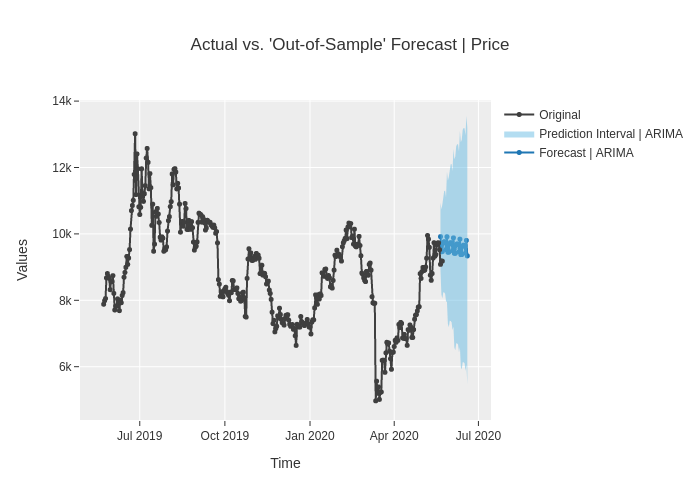

INFO:logs:Visual Rendered Successfully


In [36]:
plot_model(model, plot = 'forecast', data_kwargs = {'fh' : 30})

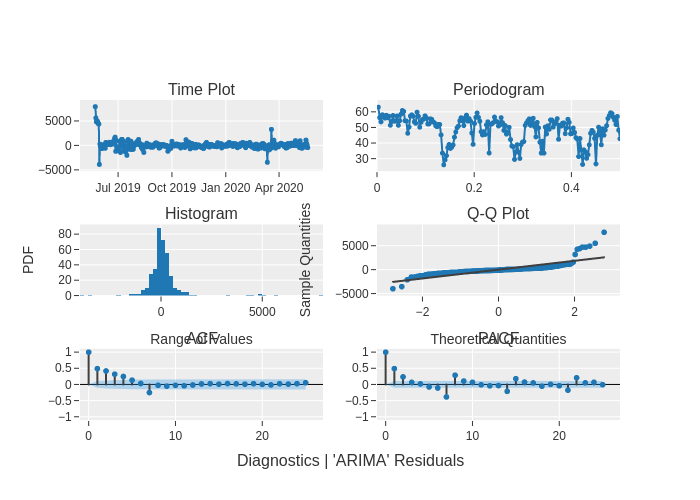

INFO:logs:Visual Rendered Successfully


In [38]:
plot_model(model, plot = 'diagnostics')

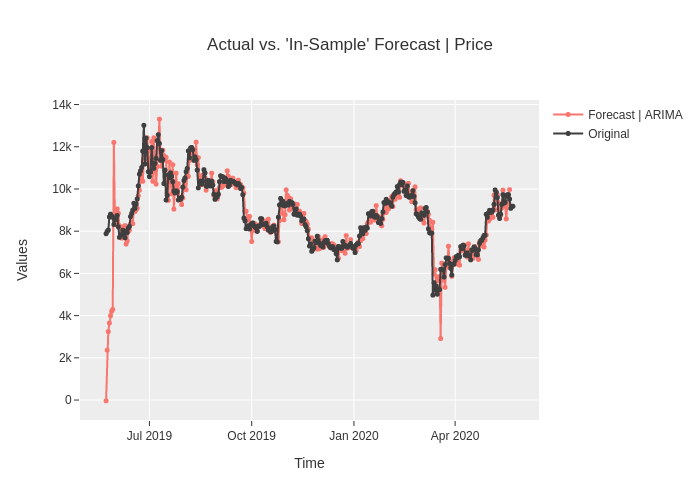

INFO:logs:Visual Rendered Successfully


In [37]:
plot_model(model, plot = 'insample')

In [40]:
final_best = finalize_model(model)
predict_model(model, fh = 30)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(self=<pycaret.time_series.forecasting.oop.TSForecastingExperiment object at 0x7fe5ac57c2b0>, estimator=ARIMA(seasonal_order=(0, 1, 0, 7)), fit_kwargs=None, groups=None, model_only=True, experiment_custom_tags=None, display=None)
INFO:logs:Finalizing ARIMA(seasonal_order=(0, 1, 0, 7))
INFO:logs:Initializing create_model()
INFO:logs:create_model(self=<pycaret.time_series.forecasting.oop.TSForecastingExperiment object at 0x7fe5ac57c2b0>, estimator=ARIMA(seasonal_order=(0, 1, 0, 7)), fold=None, round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=True, probability_threshold=None, experiment_custom_tags=None, verbose=False, system=False, add_to_model_list=False, metrics=None, display=None, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:

,y_pred
2020-05-21,9918.4919
2020-05-22,9460.6892
2020-05-23,9469.4462
2020-05-24,9732.4753
2020-05-25,9764.7894
2020-05-26,9749.2281
2020-05-27,9529.3600
2020-05-28,9914.2870
2020-05-29,9448.3746
2020-05-30,9450.9173


In [41]:
save_model(final_best, 'my_predicted_model')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=ARIMA(seasonal_order=(0, 1, 0, 7)), model_name=my_predicted_model, prep_pipe_=None, verbose=True, use_case=MLUsecase.TIME_SERIES, kwargs={})
INFO:logs:Adding model into prep_pipe
INFO:logs:my_predicted_model.pkl saved in current working directory
INFO:logs:ARIMA(seasonal_order=(0, 1, 0, 7))
INFO:logs:save_model() successfully completed......................................


Transformation Pipeline and Model Successfully Saved


(ARIMA(seasonal_order=(0, 1, 0, 7)), 'my_predicted_model.pkl')

In [42]:
loaded_model = load_model('/content/my_predicted_model')
print(loaded_model)

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=/content/my_predicted_model, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded
ARIMA(seasonal_order=(0, 1, 0, 7))
